# Explore logsitic regression for classification
Ke Xu

In [1]:
import numpy as np
import matplotlib.pyplot as plt

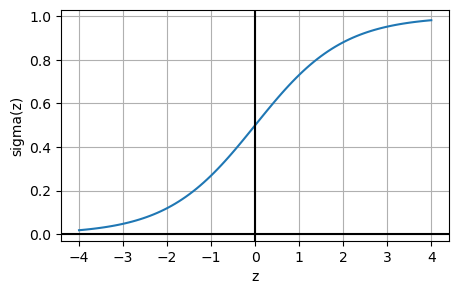

In [2]:
# Logistic Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# create a range of values from -4 to 4 with 100 steps in between
z = np.linspace(-4, 4, 100)
# apply the sigmoid function to the range
g_z = sigmoid(z)


# plot the sigmoid function
plt.figure(figsize=(5, 3))
plt.plot(z, g_z)

plt.xlabel('z')
plt.ylabel('sigma(z)')

plt.grid(True)
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.show()

In [3]:
# load iris data set as pandas dataframe
# note that instance aren't shuffled
from sklearn import datasets
iris = datasets.load_iris(as_frame=True)
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [4]:
# show target
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [5]:
# show target names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# set X and y
# X should contain petal length and petal width
# y should be 1 if target is virginica, 0 otherwise
# we set y as boolean for binary classification
# note that we use numpy array instead of pandas dataframe
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'

In [7]:
# import logistic regression
# fit model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression() 
log_reg.fit(X, y)

LogisticRegression()

In [8]:
# show intercept and coefficients
log_reg.intercept_, log_reg.coef_

(array([-17.5481106]), array([[2.77762524, 2.38552012]]))

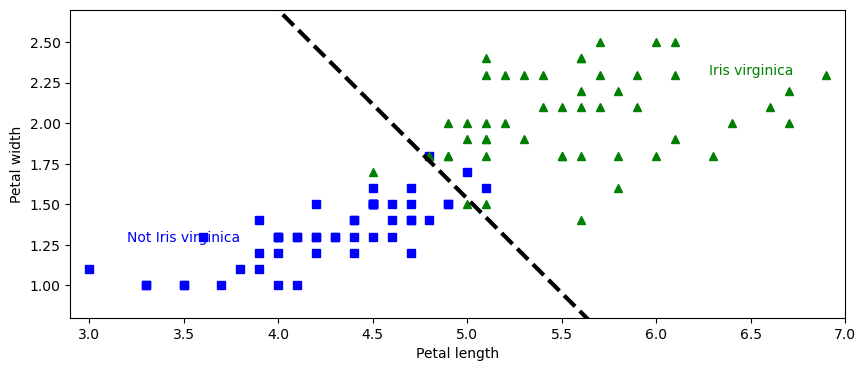

In [10]:
# for plotting the decision boundary, we need two points
# create two x1 values, say 2.9 and 7 (min and max of petal length)
# then calculate the corresponding x2 values 
# using the decision boundary equation
two_x1 = np.array([2.9, 7])
theta_0 = log_reg.intercept_[0] # intercept is a 1D array with one element
theta_1 = log_reg.coef_[0, 0] # coef_ is a 2D array with one row and two columns
theta_2 = log_reg.coef_[0, 1] # coef_ is a 2D array with one row and two columns
two_x2 = -(theta_0 + theta_1 * two_x1) / theta_2

plt.figure(figsize=(10, 4))

# plot the training instances of class 0 as blue squares (bs)
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs")
# plot the training instances of class 1 as green triangles (g^)
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^")

# plot the decision boundary as a k-- line. k-- is black dashed line
plt.plot(two_x1, two_x2, "k--", linewidth=3)

# show text labels for the class 0 and class 1
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")

# show the xlabel and ylabel
plt.xlabel("Petal length")
plt.ylabel("Petal width")

# show the axes from 2.9 to 7 and 0.8 to 2.7
# these are the min and max values of petal length and petal width
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

In [11]:
# create a new instance with petal length 6 and petal width 2
# predict the class of the new instance
log_reg.predict([[6, 2]])

array([ True])

In [12]:
# show probability of the new instance being class 0 and class 1
log_reg.predict_proba([[6, 2]])

array([[0.02006162, 0.97993838]])

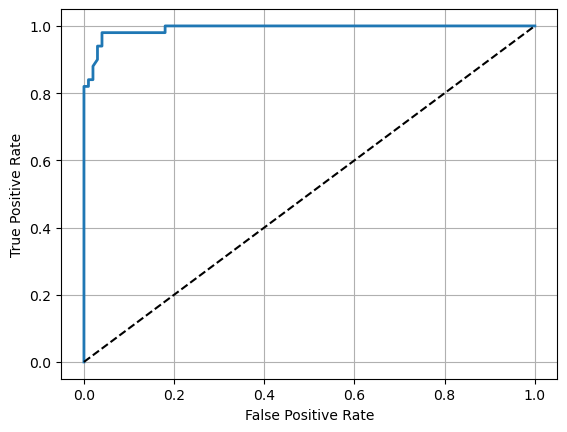

In [13]:
# build roc curve using cross_val_predict
# first, get the decision scores
# then, use the decision scores to build roc curve
# finally, plot the roc curve

from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(log_reg, X, y, cv=3, method="decision_function")

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)

plot_roc_curve(fpr, tpr)

In [14]:
# show confusion matrix using cross_val_predict
# first, get the predictions
# then, use the predictions to build confusion matrix
# finally, plot the confusion matrix

from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(log_reg, X, y, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[96,  4],
       [ 2, 48]])

The goal is to make a logistic regression classifier on the sepal features for the binary clasification problem of virginica / not virginica.

In [15]:
# set X and y
# X should contain sepal length and sepal width
# y should be 1 if target is virginica, 0 otherwise
# we set y as boolean for binary classification
# note that we use numpy array instead of pandas dataframe
X_sepal = iris.data[['sepal length (cm)', 'sepal width (cm)']].values
y_sepal = iris.target_names[iris.target] == 'virginica'

In [16]:
# Create a logistic regresion object and fit it to the problem we are trying to solve
log_reg_sepal = LogisticRegression() 
log_reg_sepal.fit(X_sepal, y_sepal)


LogisticRegression()

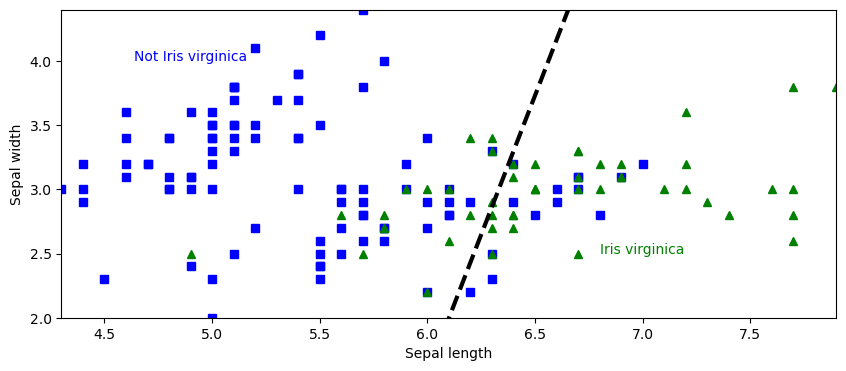

In [19]:
# create two x1 values, the min and max of sepal length (hint use X[:,0] to access the sepal lengths)
# then calculate the corresponding x2 values 
# using the decision boundary equation
two_x1_sepal = np.array([np.min(X_sepal[:, 0]), np.max(X_sepal[:, 0])])
theta_0_sepal = log_reg_sepal.intercept_[0]
theta_1_sepal = log_reg_sepal.coef_[0, 0]
theta_2_sepal = log_reg_sepal.coef_[0, 1]
two_x2_sepal = -(theta_0_sepal + theta_1_sepal * two_x1_sepal) / theta_2_sepal

plt.figure(figsize=(10, 4))

# plot the training instances of class 0 as blue squares (bs)
plt.plot(X_sepal[y_sepal == 0, 0], X_sepal[y_sepal == 0, 1], "bs")

# plot the training instances of class 1 as green triangles (g^)
plt.plot(X_sepal[y_sepal == 1, 0], X_sepal[y_sepal == 1, 1], "g^")

# plot the decision boundary as a k-- line. k-- is black dashed line
plt.plot(two_x1_sepal, two_x2_sepal, "k--", linewidth=3)

# show text labels for the class 0 and class 1
# Just put these in a reasonable place (4.9, 4) and (7,2.5) are what I would recommend
plt.text(4.9, 4, "Not Iris virginica", color="b", ha="center")
plt.text(7, 2.5, "Iris virginica", color="g", ha="center")

# show the xlabel and ylabel
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

# show the axes from the min and max values of petal length and petal width
plt.axis([np.min(X_sepal[:,0]), np.max(X_sepal[:,0]), np.min(X_sepal[:,1]), np.max(X_sepal[:,1])])

plt.show()

In [20]:
# Get the decision scores 
y_scores_sepal = cross_val_predict(log_reg_sepal, X_sepal, y_sepal, cv=3, method="decision_function")


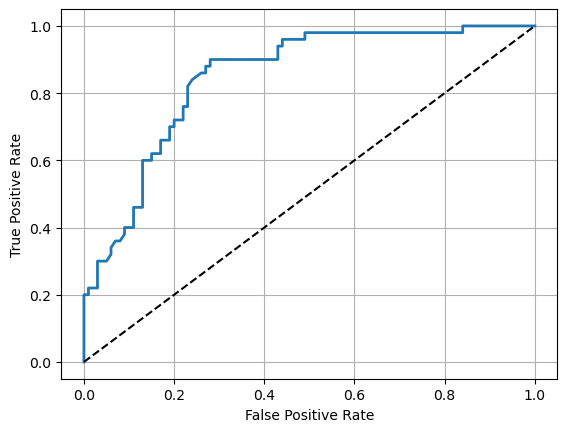

In [21]:
# compute the roc curve
fpr_sepal, tpr_sepal, thresholds_sepal = roc_curve(y_sepal, y_scores_sepal)


# plot the roc curve
plot_roc_curve(fpr_sepal, tpr_sepal)


In [22]:
# Get the predictions for the default threshold
y_pred_sepal = cross_val_predict(log_reg_sepal, X_sepal, y_sepal, cv=3)


In [23]:
# Print the confusion matrix
conf_matrix_sepal = confusion_matrix(y_sepal, y_pred_sepal)
conf_matrix_sepal

array([[82, 18],
       [17, 33]])